In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cmath

In [2]:
# construct power curve
sp0 = 4
spn = 24
npoints = spn - sp0 + 1
speeds = np.zeros(npoints)
powers_VG = np.zeros(npoints)
fname = "../IEA-15-240-RWT-Monopile/power_output_noVG.txt"
fname_VG = "../IEA-15-240-RWT-Monopile/power_output_VG.txt"
data = np.genfromtxt(fname,skip_header=2)
speeds = data[:,0]
powers = data[:,1]
#data_VG = np.genfromtxt(fname_VG,skip_header=2)
#powers_VG = data_VG[:,1]
#if (!np.array_equal(speeds,data_VG[:,1])):
#    print("Error: speed arrays not equal")

In [3]:
# Weibull pdf
p_area = np.zeros(npoints)
k = 2.0
xbar = 10
#A = xbar / gamma(1.0 + 1.0/k)
A = xbar / (np.sqrt(np.pi) / 2)
for n in range(sp0, spn+1):
    left = float(n)-0.5
    right = float(n)
    
    cdf_l = 1.0 - np.exp(-((left/A)**k))
    cdf_r = 1.0 - np.exp(-((right/A)**k))
    
    p_area[n-sp0] = cdf_r - cdf_l

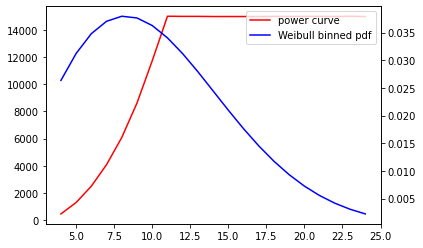

In [4]:
plt.figure

ax1 = plt.subplot()
l1, = ax1.plot(speeds,powers, color='red')
#l11, = ax1.plot(speeds,powers_VG, color='green')
ax2 = ax1.twinx()
l2, = ax2.plot(speeds,p_area, color='blue')

plt.legend([l1, l2], ["power curve", "Weibull binned pdf"])
#plt.legend([l1, l11, l2], ["power curve", "power curve with VGs", "Weibull binned pdf"])
plt.show()

In [5]:
# Calculate AEP
AEP = 0
AEP_VG = 0
for n in range(sp0, spn+1):
    # pwr in kW -> AEP in GWh
    AEP += p_area[n-sp0] * powers[n-sp0] * 24 * 365 / 1e6 
    AEP += p_area[n-sp0] * powers_VG[n-sp0] * 24 * 365 / 1e6 
print(AEP)

39.270535096736694
